In [1]:
# 1. Import libraries
import ast 
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt
import seaborn as sns 

# 2. Load a dataset
ds = load_dataset("lukebarousse/data_jobs")  

df_copy = ds['train'].to_pandas()  

df = df_copy.copy()  


# 3. Data cleaning
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)  

df['job_skills'] = df['job_skills'].apply(
    lambda skills: ast.literal_eval(skills) if pd.notna(skills) else []
)

c:\Users\User\anaconda3\envs\analysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


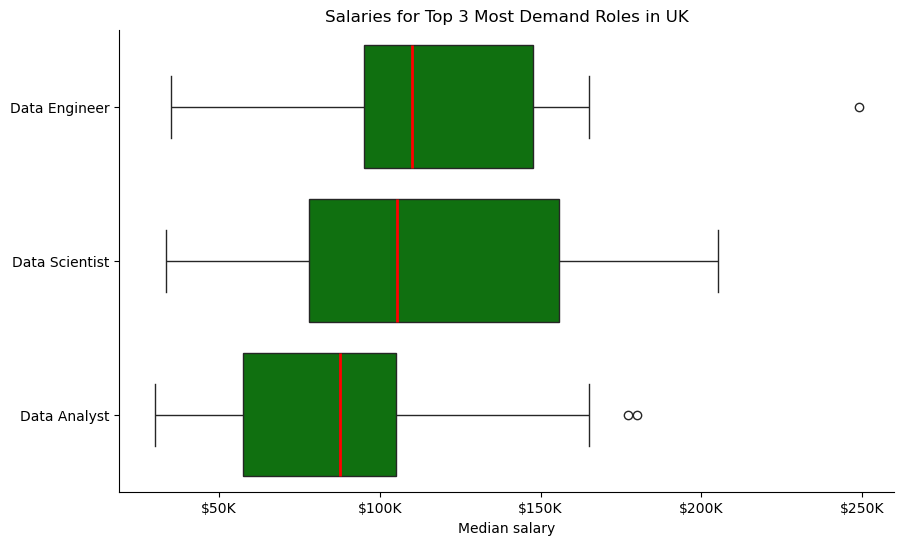

In [3]:
# 1. Filter dataset for a specific country and top 3 job titles
df_uk = df[
    (df['job_country'] == df['job_country'].value_counts().index[2]) & 
    (df['job_title_short'].isin(df['job_title_short'].value_counts().index[:3]))
]
# Select the third most common country and the top 3 most frequent job titles

# 2. Remove rows with missing salary data
df_final = df_uk.dropna(subset='salary_year_avg')

# 3. Determine the order of job titles by median salary
top_4 = df_final.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
# top_4 will be used to order the boxplot

# 4. Plot salaries as a horizontal boxplot
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_final, 
    x='salary_year_avg', 
    y='job_title_short', 
    order=top_4, 
    color='green', 
    medianprops={'color':'red', 'linewidth':2}  # Make the median line bold and red
)

sns.despine()  # Remove top and right spines for a cleaner look

# 5. Format x-axis to show salary in $K
ax = plt.gca()
from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: f'${int(x/1000)}K'))

# 6. Add labels and title
plt.xlabel('Median salary')
plt.ylabel('')  # Remove y-axis label
plt.title('Salaries for Top 3 Most Demand Roles in UK')
plt.show()